# SNSim Examples


### Example to show how generate SN parameters for a large number of objects

In [1]:
import sys
import snsim
import numpy as np
import matplotlib.pyplot as plt
from astropy.time import Time

In [2]:
# Check if there is sdfmap files
snsim.dust_utils.check_files_and_download()

## now we generate parameters for SNIa

### SN generator parameters

In [3]:
randseed = 1234 #random seed for generation
n_obj = 5000 #number of SN to generate
z_range = [0.02, 0.2] #redshift range to extract SN redshift

#time range of SNIa observation to extract t0 for each object
time_range = ["2021-08-03", "2022-08-03"]
time_range=[Time(time_range[0]).mjd, Time(time_range[1]).mjd]


snia_gen = {'M0': 'jla', #'jla' is a default value, you can just put a number
            'sigM': 0.12,# intrinsic scatter of SNIA in Hubble Diagram
            #'sct_model': 'G10', #'G10' and 'C11' default values for scattering model of SNIa
            'rate': 'ztf20', #default rate value, you can use a general lambda function for rate 
            'model_config': {'model_name': 'salt2',
                             'alpha': 0.14,
                             'beta': 2.9,
                             'dist_x1': 'N21',#default value, you can use gauss distribution [mean,sig] or
                                             # asymmetric gaussian [mean,sig1,sig2]
                             'dist_c': [-0.055, 0.023, 0.150]}} #asym gaussian for generate c parameter of salt model
                                                                    

cosmology = {'name':'planck18'} #cosmology, in astropy format


#CMB dipole, in this case is set to 0
cmb = {'v_cmb': 0,
       'l_cmb':0,
       'b_cmb':0}

#distribution of peculiar velocities of SNe
vpec_dist = {'mean_vpec':0,
             'sig_vpec':300}

#MW dust map, default from sncosmo
mw_dust = {'model': 'CCM89',}



## Init SNSIM generator object

In [4]:
# Take the SN parameters generator class
gen_class = getattr(snsim.generators, snsim.generators.__GEN_DIC__['snia_gen'])

# Give the input configuration
SNgenerator = gen_class(snia_gen,
                        cmb,
                        snsim.utils.set_cosmo(cosmology),
                        z_range=z_range,
                        time_range=time_range,
                        vpec_dist=vpec_dist,
                        mw_dust=mw_dust,
                       )# there is also a parameter  called geometry to give the fields where extract ra, dec of SNe
                        # in this case we generate SNe full sky



# Gen basic parameters
params = SNgenerator.gen_astrobj_par(n_obj, randseed)


## some plots to show what we generate for the moment ( hust general parameters)

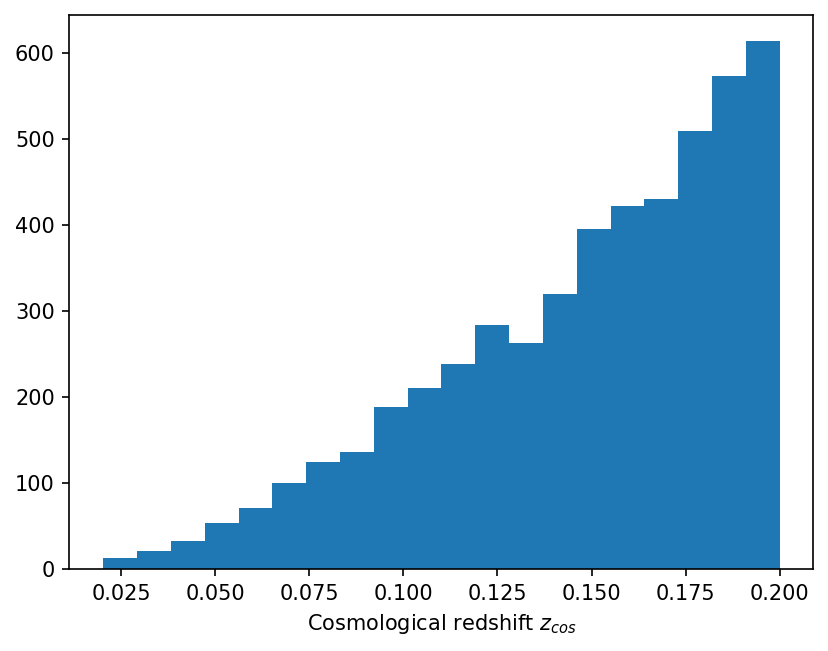

In [5]:
# Plot redshift hist (scale with cosmological volume)
plt.figure(dpi=150)
plt.hist(params['zcos'], bins=20)
plt.xlabel('Cosmological redshift $z_{cos}$')
plt.show()

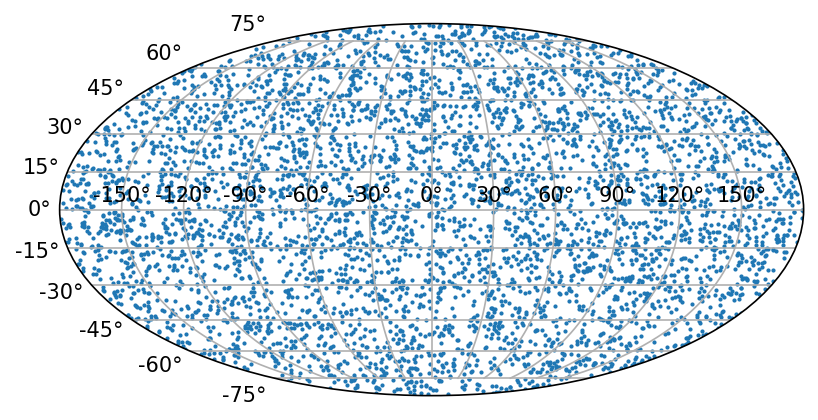

In [6]:
# Plot SN positions
plt.figure(dpi=150)
plt.subplot(projection='mollweide')
plt.scatter(params['ra'] - np.pi, params['dec'], s=1)
plt.grid()
plt.show()

## Now generate SN parameters calling the generator object

In [7]:
# Generate SN obj
SNs = SNgenerator(n_obj, randseed, astrobj_par=params)

{'mw_dust': {'model': 'CCM89', 'rv': 3.1},
 'mod_fcov': False,
 'M0': -19.123830232811475,
 'sigM': 0.12,
 'alpha': 0.14,
 'beta': 2.9}

#### some plots to show the generated parameters

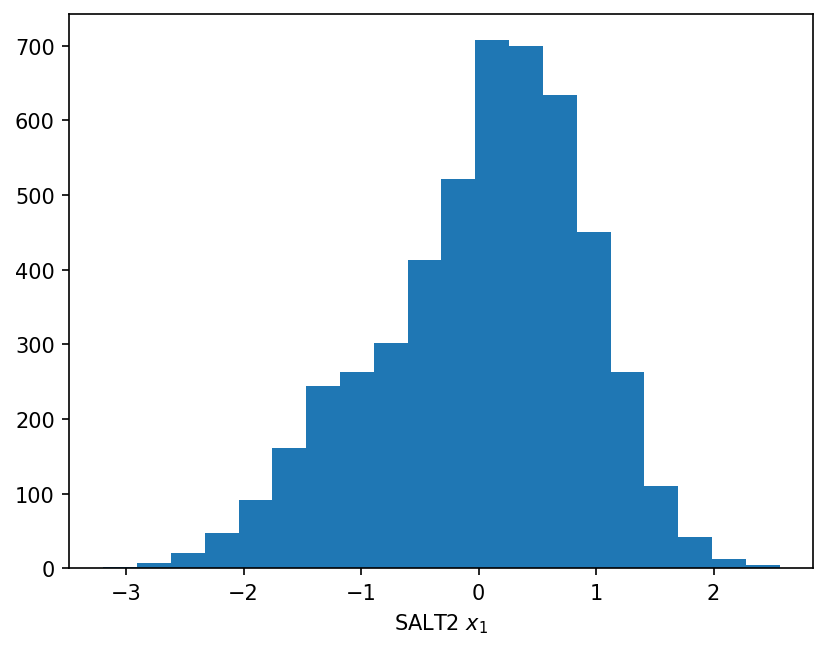

In [9]:
# Plot x1 dist
plt.figure(dpi=150)
plt.hist([SN.sim_x1 for SN in SNs], bins=20)
plt.xlabel('SALT2 $x_1$')
plt.show()

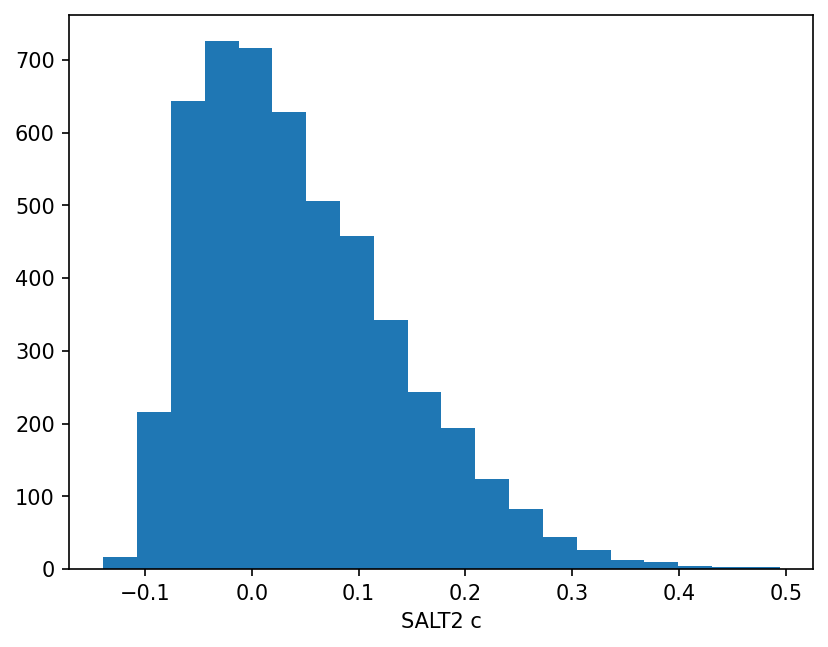

In [10]:
# Plot c dist
plt.figure(dpi=150)
plt.hist([SN.sim_c for SN in SNs], bins=20)
plt.xlabel('SALT2 c')
plt.show()

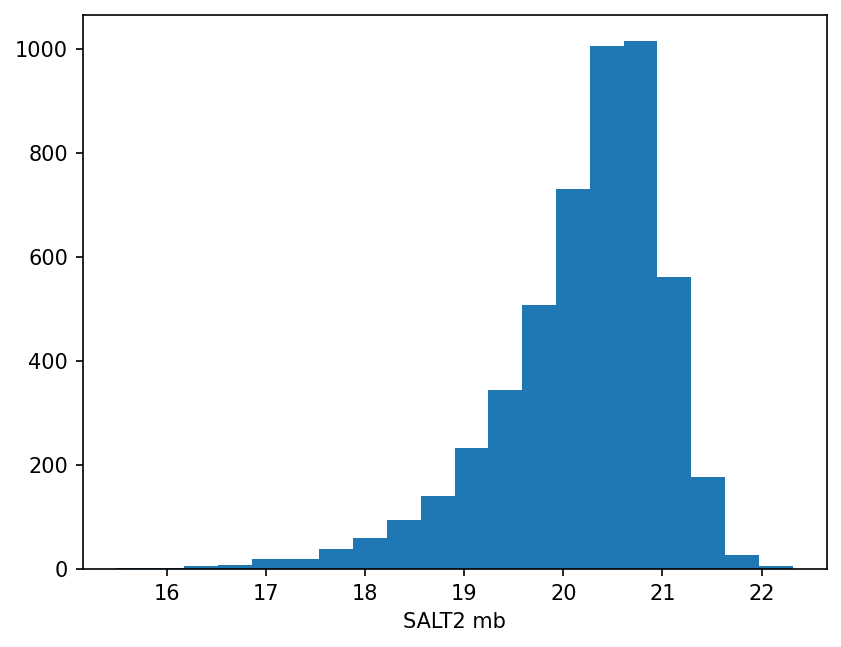

In [11]:
# Plot mb dist
plt.figure(dpi=150)
plt.hist([SN.sim_mb for SN in SNs], bins=20)
plt.xlabel('SALT2 mb')
plt.show()

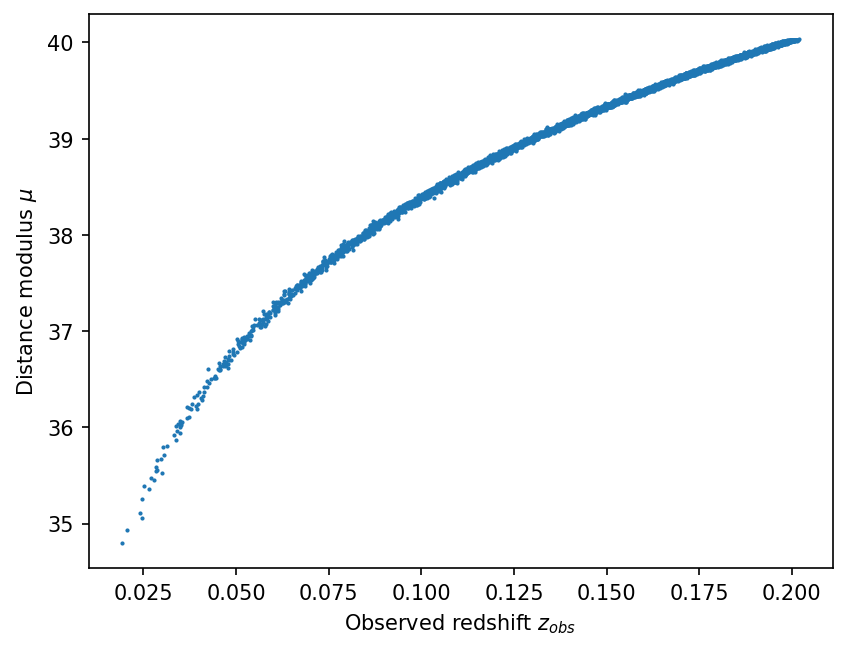

In [12]:
# Plot HD (with peculiar velocities effect on z)
plt.figure(dpi=150)
plt.scatter([SN.zobs for SN in SNs], [SN.sim_mu for SN in SNs], s=1)
plt.xlabel('Observed redshift $z_{obs}$')
plt.ylabel('Distance modulus $\mu$')
plt.show()

## Now we genrate parametrs for SN core-collapse

### in this example we generate SNIIb, the procedure is the same for every sncc obj in SNSIM

In [34]:
randseed = 5678 #random seed for generation
n_obj = 6000 #number of SN to generate
z_range = [0.05, 0.25] #redshift range to extract SN redshift

#time range of SNIa observation to extract t0 for each object
time_range = ["2021-09-10", "2022-06-09"]
time_range=[Time(time_range[0]).mjd, Time(time_range[1]).mjd]


sniib_gen = {'M0': 'li11_gaussian', # absolute magnitude in r-band 
                                     #'li11_gaussian' & 'li11_skewed' are the default values, but 
                                     #you can just put a number
            'sigM': 'li11_gaussian',#scatter of SNIIb luminosity function, default values are 
                                     #'li11_gaussian' & 'li11_skewed'
                                     #you can just put a list with [sig,sig] for gaussian scatter or
                                     #[sig1,sig2] for asymmetric gaussian scatter
            'rate': 'ptf19', #default rate value, you can use a general lambda function for rate
            'model_config': {'model_name': ['v19-2006t','v19-2008aq','v19-2008ax','v19-2008bo']
                            }}# here we pass a list of sncosmo template as model, the generator ramndomly extract the
                             #the template to generate each object. you can pass just 1 template or the default which
                             # are: 'all', 'vinc_corr' and vinc_nocorr'

#Cosmology, CMB dipole, peculiar velocity and dust same as previous example


### Init the generator

In [35]:
# Take the SN parameters generator class
gen_class = getattr(snsim.generators, snsim.generators.__GEN_DIC__['sniib_gen'])

# Give the input configuration
SNgenerator = gen_class(sniib_gen,
                        cmb,
                        snsim.utils.set_cosmo(cosmology),
                        z_range=z_range,
                        time_range=time_range,
                        vpec_dist=vpec_dist,
                        mw_dust=mw_dust,                        
                       )



# Gen basic parameters
params = SNgenerator.gen_astrobj_par(n_obj, randseed)


### generate the SNIIb

In [36]:
# Generate SN obj
SNs = SNgenerator(n_obj, randseed, astrobj_par=params)

#### some plots

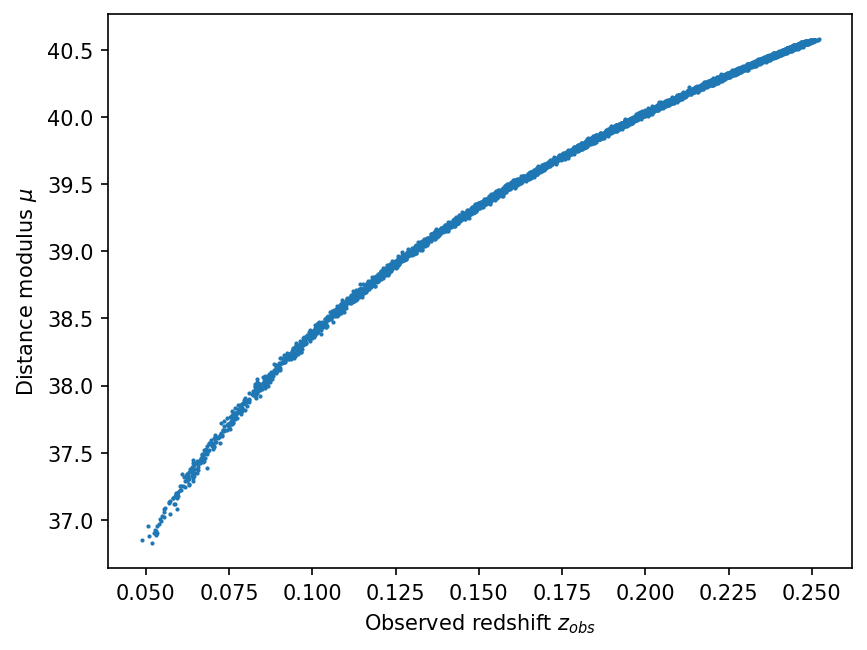

In [37]:
# Plot HD (with peculiar velocities effect on z)
plt.figure(dpi=150)
plt.scatter([SN.zobs for SN in SNs], [SN.sim_mu for SN in SNs], s=1)
plt.xlabel('Observed redshift $z_{obs}$')
plt.ylabel('Distance modulus $\mu$')
plt.show()

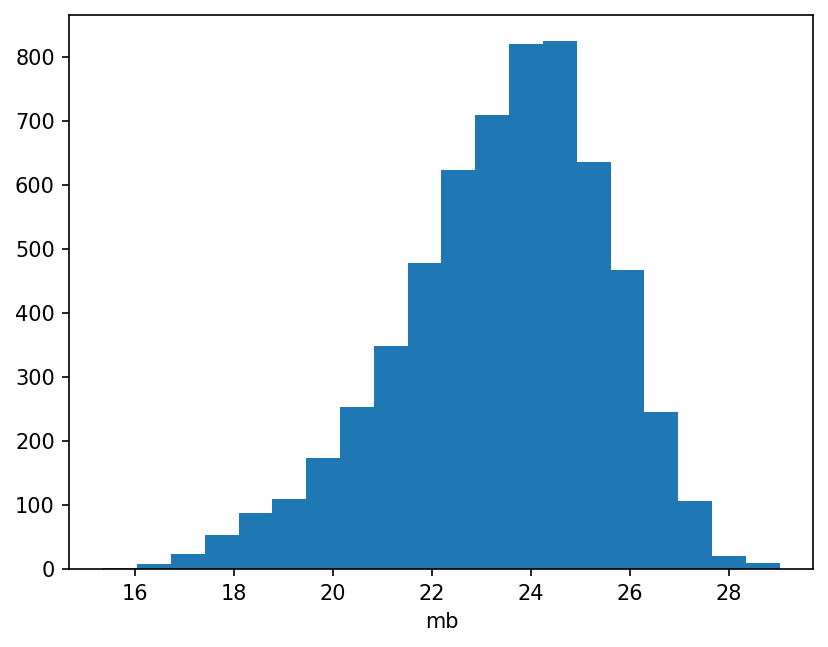

In [38]:
# Plot mb dist
plt.figure(dpi=150)
plt.hist([SN.sim_mb for SN in SNs], bins=20)
plt.xlabel('mb')
plt.show()

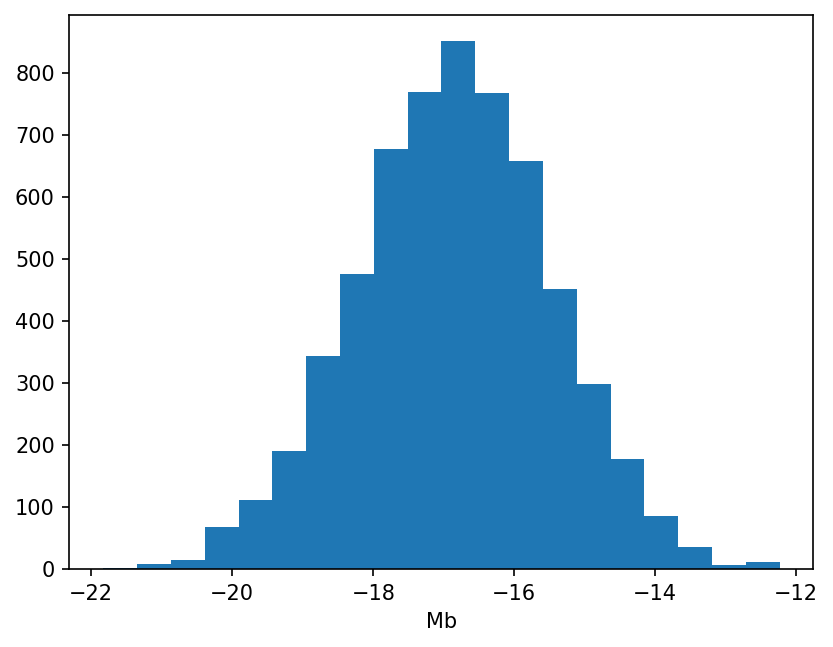

In [39]:
# Plot mb dist
plt.figure(dpi=150)
plt.hist([SN.M0 for SN in SNs], bins=20)
plt.xlabel('Mb')
plt.show()

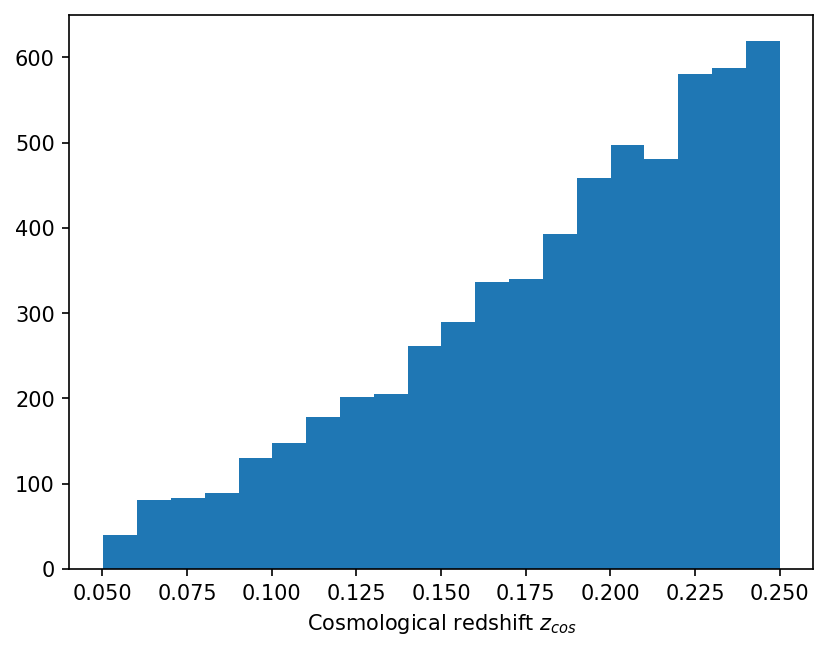

In [40]:
# Plot redshift hist (scale with cosmological volume)
plt.figure(dpi=150)
plt.hist(params['zcos'], bins=20)
plt.xlabel('Cosmological redshift $z_{cos}$')
plt.show()